In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from tensorflow.keras.callbacks import EarlyStopping

In [37]:
#Load the dataset, identify features and targets .
#Split into training and testing 
df= pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [39]:
#Aelect target and features
y=df['charges']
X=df.drop(columns='charges')

In [40]:
#Separate Numerical and categorical features
numerical = X.select_dtypes(include=["int64", "float64"]).columns
categorical= X.select_dtypes(include=["object"]).columns

In [41]:
#Prepocess the features
# Standardize numerical features
numerical_preprocessor=Pipeline(steps=[
    ('scaler',StandardScaler()) 
])

#Encode the categorical variables
categorical_preprocessor = Pipeline(steps=[
    ('encoder',OneHotEncoder(handle_unknown="ignore"))
])

#Combine the preprocessors



In [42]:
preprocessor=ColumnTransformer(transformers=[
    ('num',numerical_preprocessor,numerical),
    ('cat',categorical_preprocessor,categorical)
],remainder="passthrough")

In [43]:
#Apply preprocessing to X and convert to dense array
#Dense array is one which ,ost values are zero and is compatible with ML models
X= preprocessor.fit_transform(X)
type(X)

numpy.ndarray

In [44]:
#split the data to training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [45]:
#Scale the target
Y_scaler = StandardScaler()
y_train = Y_scaler.fit_transform(y_train.values.reshape(-1,1))
y_test = Y_scaler.fit_transform(y_test.values.reshape(-1,1))

In [46]:
#Building neural network model
model=Sequential([
    Dense(100,input_dim= X_train.shape[1],activation='relu'),
    Dropout(0.2),
    Dense(64,activation='relu'),
    Dropout(0.2),
    Dense(1)
])

In [47]:
#Compiling the model
model.compile(optimizer='Adam',loss='mse',metrics=['mae'])

In [48]:
#Early stopping
early_stopping = EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True
)
#Train the model 
modtrain= model.fit(
    X_train,y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1

)


Epoch 1/100
27/27 [==============================] - 0s 16ms/step - loss: 0.7650 - mae: 0.6373 - val_loss: 0.4652 - val_mae: 0.4720
Epoch 2/100
27/27 [==============================] - 0s 3ms/step - loss: 0.4171 - mae: 0.4642 - val_loss: 0.2394 - val_mae: 0.3358
Epoch 3/100
27/27 [==============================] - 0s 4ms/step - loss: 0.2790 - mae: 0.3777 - val_loss: 0.1917 - val_mae: 0.2666
Epoch 4/100
27/27 [==============================] - 0s 3ms/step - loss: 0.2657 - mae: 0.3616 - val_loss: 0.1717 - val_mae: 0.2717
Epoch 5/100
27/27 [==============================] - 0s 4ms/step - loss: 0.2371 - mae: 0.3331 - val_loss: 0.1600 - val_mae: 0.2851
Epoch 6/100
27/27 [==============================] - 0s 3ms/step - loss: 0.2263 - mae: 0.3249 - val_loss: 0.1633 - val_mae: 0.2538
Epoch 7/100
27/27 [==============================] - 0s 3ms/step - loss: 0.2219 - mae: 0.3182 - val_loss: 0.1571 - val_mae: 0.2539
Epoch 8/100
27/27 [==============================] - 0s 3ms/step - loss: 0.2158 - 

In [49]:
#Making predictions wit the fitted model
prediction = model.predict(X_test)
prediction

array([[-0.25209773],
       [-0.5874936 ],
       [ 1.2431722 ],
       [-0.3947572 ],
       [ 1.3932278 ],
       [-0.67286503],
       [-0.6924903 ],
       [ 0.08223855],
       [-0.58689576],
       [-0.25800818],
       [ 0.18682884],
       [-0.3960483 ],
       [-0.65386665],
       [ 2.6707358 ],
       [ 3.1764398 ],
       [ 2.66294   ],
       [-0.22135685],
       [ 2.543432  ],
       [-0.26883993],
       [ 0.8721008 ],
       [-0.81440556],
       [-0.43107283],
       [-0.9495905 ],
       [-0.53996265],
       [-0.1525395 ],
       [-0.00507281],
       [ 0.04074398],
       [-0.34049538],
       [-0.2112423 ],
       [-0.9473995 ],
       [-0.39336666],
       [-0.03784776],
       [-0.8267192 ],
       [-0.49407527],
       [-0.72855353],
       [-0.3137365 ],
       [-0.7445636 ],
       [-0.35872748],
       [ 0.68989205],
       [ 2.2835164 ],
       [-0.68381697],
       [-0.7014268 ],
       [ 0.0977511 ],
       [ 0.06157043],
       [-0.48564705],
       [-0

In [50]:
#Convert back to original scale
prediction1= Y_scaler.inverse_transform(prediction)
y_test_original= Y_scaler.inverse_transform(y_test)

In [51]:
#Check the results
results = pd.DataFrame({'Actual':y_test_original.flatten(),'Predicted':prediction1.flatten()})
results.head()

,Actual,Predicted
0,9095.06825,9827.208008
1,5272.17580,5648.214355
2,29330.98315,28458.099609
3,9301.89355,8049.687500
4,33750.29180,30327.775391


In [52]:
results['Actual'] = results['Actual'].apply(lambda x: round(x, 2))
results['Predicted'] = results['Predicted'].apply(lambda x: round(x, 2))

In [53]:
results.head()

,Actual,Predicted
0,9095.07,9827.21
1,5272.18,5648.21
2,29330.98,28458.10
3,9301.89,8049.69
4,33750.29,30327.78


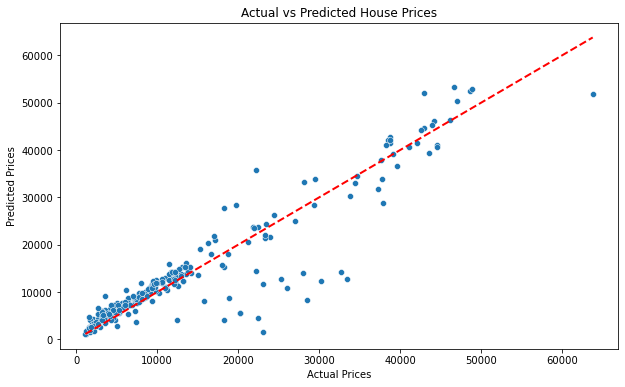

In [54]:
# Visualization: Actual vs Predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=results["Actual"], y=results["Predicted"])
plt.plot([results["Actual"].min(), results["Actual"].max()],
         [results["Actual"].min(), results["Actual"].max()],
         color="red", linestyle="--", linewidth=2)  # Line of perfect prediction
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()